C:\Users\zveng\AppData\Local\Temp\ipykernel_155732\1959715635.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Experiment', y='Spearman', data=df_results, palette=colors)
C:\Users\zveng\AppData\Local\Temp\ipykernel_155732\1959715635.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Experiment', y='MAE', data=df_results, palette=colors)
C:\Users\zveng\AppData\Local\Temp\ipykernel_155732\1959715635.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x='Experiment', y='Accuracy', data=df_results

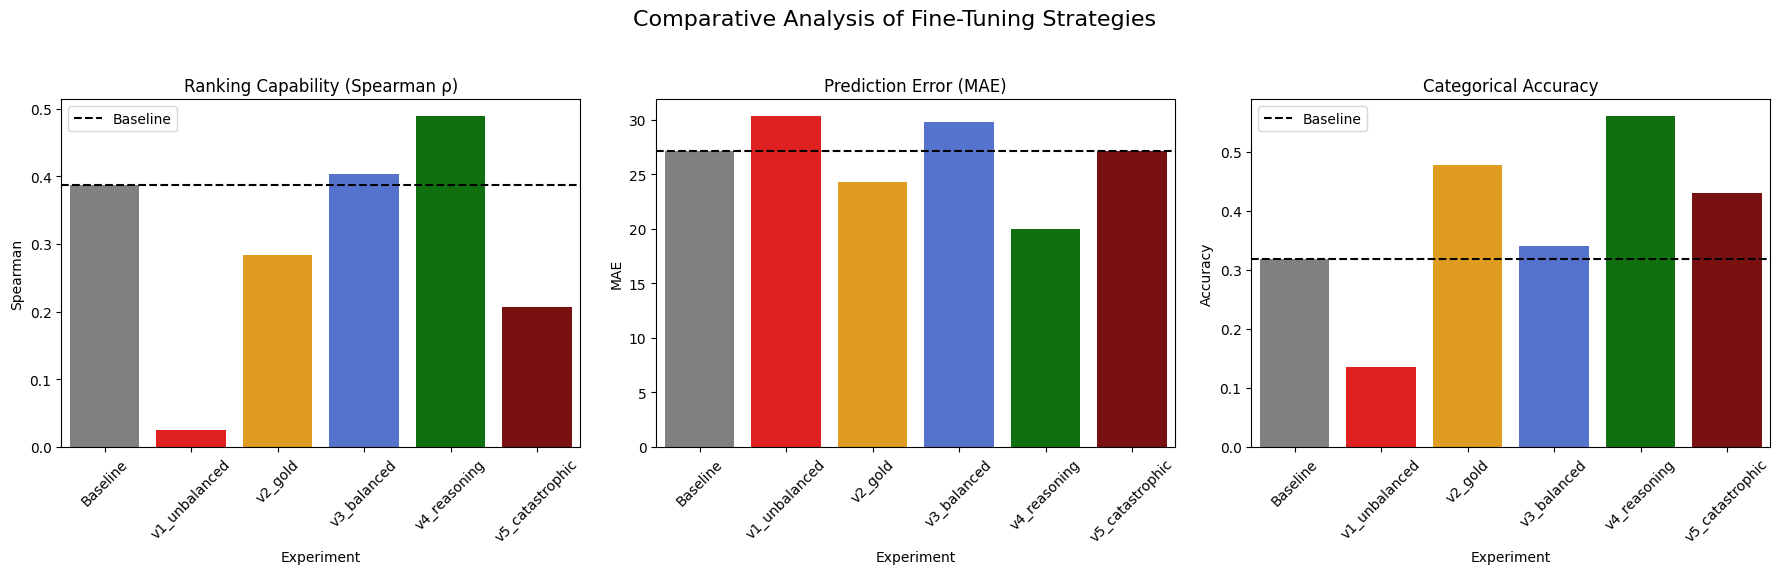

: 

In [ ]:
# Ejemplo de código para el gráfico de barras en tu notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Experiment': ['Baseline', 'v1_unbalanced', 'v2_gold', 'v3_balanced', 'v4_reasoning', 'v5_catastrophic'],
    'Spearman': [0.3878, 0.0255, 0.2836, 0.4031, 0.4894, 0.2067],
    'MAE': [27.16, 30.34, 24.32, 29.82, 19.98, 27.16],
    'Accuracy': [0.318, 0.136, 0.477, 0.341, 0.561, 0.431]
}
df_results = pd.DataFrame(data)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparative Analysis of Fine-Tuning Strategies', fontsize=16)

# Colors
colors = ['grey', 'red', 'orange', 'royalblue', 'green', 'darkred']

# Spearman Correlation Plot
sns.barplot(ax=axes[0], x='Experiment', y='Spearman', data=df_results, palette=colors)
axes[0].set_title('Ranking Capability (Spearman ρ)')
axes[0].axhline(y=df_results['Spearman'][0], color='black', linestyle='--', label='Baseline')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# MAE Plot
sns.barplot(ax=axes[1], x='Experiment', y='MAE', data=df_results, palette=colors)
axes[1].axhline(y=df_results['MAE'][0], color='black', linestyle='--', label='Baseline')
axes[1].set_title('Prediction Error (MAE)')
axes[1].tick_params(axis='x', rotation=45)

# Accuracy Plot
sns.barplot(ax=axes[2], x='Experiment', y='Accuracy', data=df_results, palette=colors)
axes[2].set_title('Categorical Accuracy')
axes[2].axhline(y=df_results['Accuracy'][0], color='black', linestyle='--', label='Baseline')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../outputs/reports/final_metrics_comparison.png', dpi=300)
plt.show()

--- Generando Análisis de Distribución de Errores para el Modelo v4 ---


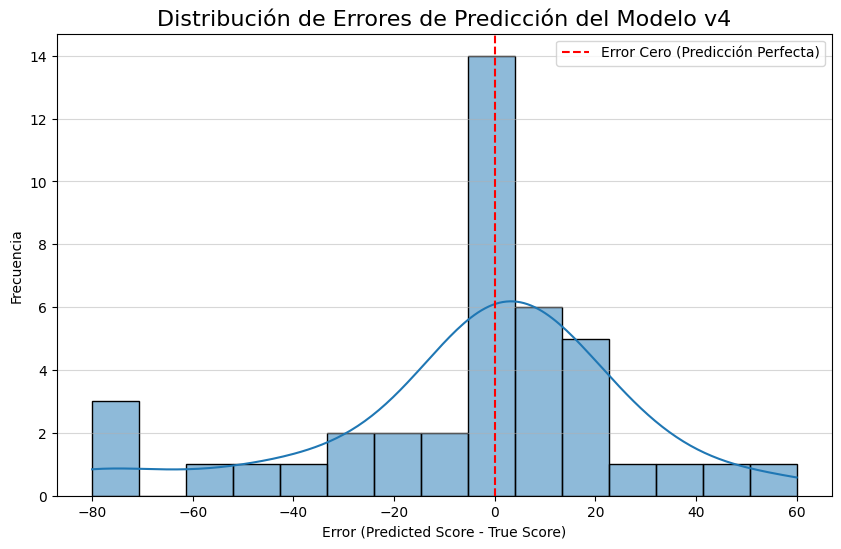


Estadísticas del Error (Modelo v4):
count    41.000000
mean     -3.926829
std      30.934924
min     -80.000000
25%     -10.000000
50%       0.000000
75%      10.000000
max      60.000000
Name: error, dtype: float64


In [9]:
# --- Celda d) Análisis de Distribución de Errores (Modelo v4) ---
print("--- Generando Análisis de Distribución de Errores para el Modelo v4 ---")

# Cargar los resultados detallados del modelo v4
df_v4_details = pd.read_csv('../outputs/reports/evaluation_details_v4_reasoning.csv')
df_v4_details.dropna(subset=['predicted_score', 'true_score'], inplace=True)

# Calcular el error
df_v4_details['error'] = df_v4_details['predicted_score'] - df_v4_details['true_score']

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_v4_details['error'], kde=True, bins=15)
plt.axvline(x=0, color='red', linestyle='--', label='Error Cero (Predicción Perfecta)')
plt.title('Distribución de Errores de Predicción del Modelo v4', fontsize=16)
plt.xlabel('Error (Predicted Score - True Score)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(axis='y', alpha=0.5)

plt.savefig('../outputs/reports/v4_error_distribution.png', dpi=300)
plt.show()

# Imprimir estadísticas descriptivas del error
print("\nEstadísticas del Error (Modelo v4):")
print(df_v4_details['error'].describe())


--- Generando Comparación de Errores v4 vs. v5 ---


C:\Users\zveng\AppData\Local\Temp\ipykernel_123532\4082875648.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='error', data=combined_errors_df, palette=['green', 'red'])


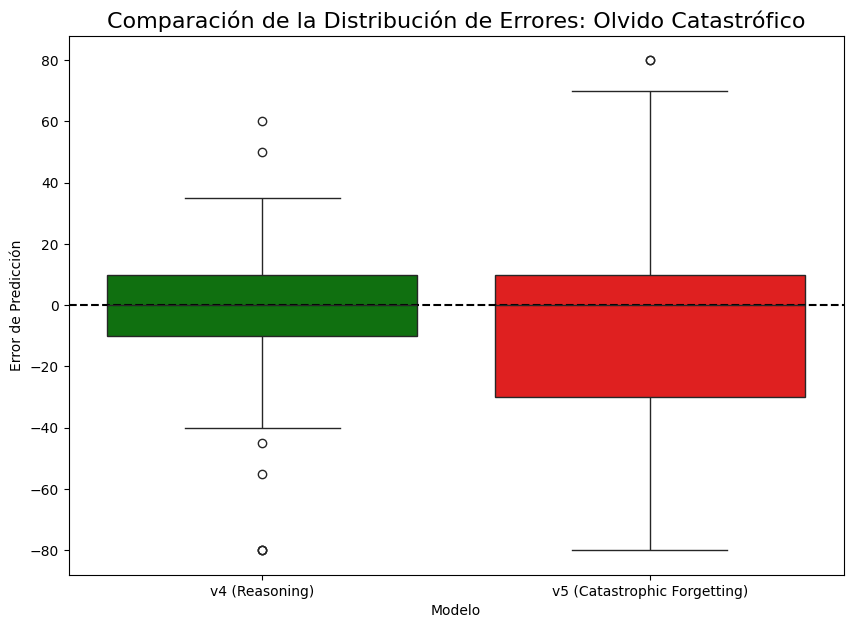

In [11]:
# --- Celda e) Comparación Visual del Olvido Catastrófico (v4 vs. v5) ---
print("\n--- Generando Comparación de Errores v4 vs. v5 ---")

# Cargar también los detalles del v5
df_v5_details = pd.read_csv('../outputs/reports/evaluation_details_v5_gold_refinement.csv')
df_v5_details.dropna(subset=['predicted_score', 'true_score'], inplace=True)
df_v5_details['error'] = df_v5_details['predicted_score'] - df_v5_details['true_score']

# Añadir una columna para identificar el modelo
df_v4_details['model'] = 'v4 (Reasoning)'
df_v5_details['model'] = 'v5 (Catastrophic Forgetting)'

# Combinar los dataframes para el plotting
combined_errors_df = pd.concat([
    df_v4_details[['model', 'error']], 
    df_v5_details[['model', 'error']]
])

# Crear el gráfico
plt.figure(figsize=(10, 7))
sns.boxplot(x='model', y='error', data=combined_errors_df, palette=['green', 'red'])
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Comparación de la Distribución de Errores: Olvido Catastrófico', fontsize=16)
plt.xlabel('Modelo')
plt.ylabel('Error de Predicción')

plt.savefig('../outputs/reports/v4_vs_v5_error_comparison.png', dpi=300)
plt.show()


--- Generando Gráfico de Correlación de Rangos para v4 ---


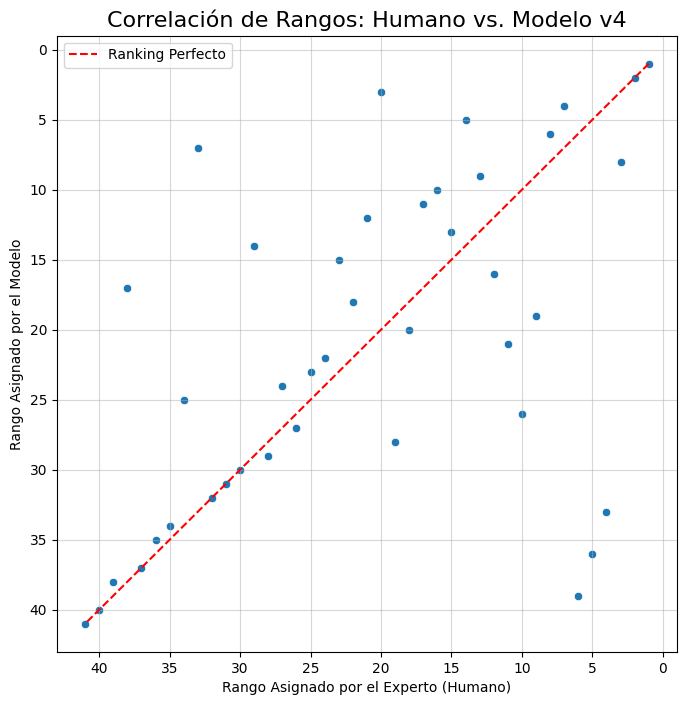

In [12]:
# --- Celda f) Gráfico de Correlación de Rangos (Modelo v4) ---
print("\n--- Generando Gráfico de Correlación de Rangos para v4 ---")

# Usamos el dataframe del v4 que ya tenemos cargado
df_v4_ranks = df_v4_details.copy()

# Calcular los rangos. 'method=first' rompe empates de forma consistente.
df_v4_ranks['true_rank'] = df_v4_ranks['true_score'].rank(method='first', ascending=False)
df_v4_ranks['predicted_rank'] = df_v4_ranks['predicted_score'].rank(method='first', ascending=False)

# Crear el gráfico
plt.figure(figsize=(8, 8))
sns.scatterplot(x='true_rank', y='predicted_rank', data=df_v4_ranks)
# Añadir la línea de ranking perfecto
plt.plot([df_v4_ranks['true_rank'].min(), df_v4_ranks['true_rank'].max()], 
         [df_v4_ranks['true_rank'].min(), df_v4_ranks['true_rank'].max()], 
         color='red', linestyle='--', label='Ranking Perfecto')
         
plt.title('Correlación de Rangos: Humano vs. Modelo v4', fontsize=16)
plt.xlabel('Rango Asignado por el Experto (Humano)')
plt.ylabel('Rango Asignado por el Modelo')
plt.gca().invert_xaxis() # El rango 1 es el mejor, así que lo ponemos a la izquierda
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True, alpha=0.5)

plt.savefig('../outputs/reports/v4_rank_correlation_plot.png', dpi=300)
plt.show()

In [13]:
# --- Celda g) Identificación Programática de Casos de Estudio (Modelo v4) ---
print("\n--- Identificando Casos Notables para Análisis Cualitativo (Modelo v4) ---")

df_v4_analysis = df_v4_details.copy()
df_v4_analysis['abs_error'] = df_v4_analysis['error'].abs()

# Encontrar los índices de los casos clave
idx_best_match = df_v4_analysis['abs_error'].idxmin()
idx_worst_overestimation = df_v4_analysis['error'].idxmax()
idx_worst_underestimation = df_v4_analysis['error'].idxmin()

# Filtrar por casos borderline (scores entre 40 y 60) y encontrar el mejor
borderline_cases = df_v4_analysis[df_v4_analysis['true_score'].between(40, 60)]
idx_best_borderline = borderline_cases['abs_error'].idxmin()

# Crear un DataFrame para mostrar los resultados
report_df = pd.DataFrame({
    "Caso de Estudio": ["Mejor Predicción (Error Mínimo)", "Peor Sobreestimación", "Peor Subestimación", "Mejor Caso 'Borderline'"],
    "True Score": [df_v4_analysis.loc[idx_best_match, 'true_score'], df_v4_analysis.loc[idx_worst_overestimation, 'true_score'], df_v4_analysis.loc[idx_worst_underestimation, 'true_score'], df_v4_analysis.loc[idx_best_borderline, 'true_score']],
    "Predicted Score": [df_v4_analysis.loc[idx_best_match, 'predicted_score'], df_v4_analysis.loc[idx_worst_overestimation, 'predicted_score'], df_v4_analysis.loc[idx_worst_underestimation, 'predicted_score'], df_v4_analysis.loc[idx_best_borderline, 'predicted_score']],
    "Error": [df_v4_analysis.loc[idx_best_match, 'error'], df_v4_analysis.loc[idx_worst_overestimation, 'error'], df_v4_analysis.loc[idx_worst_underestimation, 'error'], df_v4_analysis.loc[idx_best_borderline, 'error']]
})

# Mostrar la tabla
print("\nTabla de Casos Notables:")
display(report_df)

# Mostrar el razonamiento completo para el peor error para un análisis rápido
print("\n--- Razonamiento del Modelo en el Peor Caso de Sobreestimación ---")
print(df_v4_analysis.loc[idx_worst_overestimation, 'raw_response'])


--- Identificando Casos Notables para Análisis Cualitativo (Modelo v4) ---

Tabla de Casos Notables:


,Caso de Estudio,True Score,Predicted Score,Error
0,Mejor Predicción (Error Mínimo),95.0,95.0,0.0
1,Peor Sobreestimación,15.0,75.0,60.0
2,Peor Subestimación,95.0,15.0,-80.0
3,Mejor Caso 'Borderline',45.0,55.0,10.0



--- Razonamiento del Modelo en el Peor Caso de Sobreestimación ---
[ANALYSIS]
The CV and Job Posting are a strong match, with the candidate's extensive experience in data science, machine learning, and data engineering aligning perfectly with the core requirements of the role. The candidate's 4.56 years of experience as a Data Scientist, coupled with their advanced skills in Python, machine learning, and statistical analysis, meet the minimum qualifications and exceed the experience requirements for this Mid-Senior level position. The candidate's explicit mention of experience with 'Natural Language Processing' and 'Machine Learning' directly translates to the core functions of the Data Scientist Lead role, which requires expertise in these areas.

However, the analysis reveals a significant gap in the candidate's professional history. The CV indicates a long-term role as a Data Scientist at United Health Group, which is a major insurance provider, but there is no mention of experienc